In [1]:
import numpy as np
import matplotlib as plt
import glob
import os 
from matplotlib.cm import ScalarMappable


OutputValuesPopulation: nfiles+1 ficheros que representan el nu ́mero de individuos por casilla a cada instante de tiempo especificado (inclu ́ıda la distribucio ́n inicial). Hay tanto sficheros dentro de esa carpeta como saltos de tiempo. 
Dentro de cada uno de esos ficheros hay una columna con 10 filas de datos, una por cada casilla de espacio

OutputValuesOxygen: igual pero para los valores del oxigeno 


In [2]:
oxygen_data = "OutputValuesOxygenCOMPARACION"
population_data = "OutputValuesPopulationCOMPARACION"

n_oxygen = len(glob.glob(os.path.join(oxygen_data, "*.txt")) )
n_population = len(glob.glob(os.path.join(population_data, "*.txt")))


if n_oxygen != n_population:

    print(f'There are {n_oxygen} files of oxygen data but {n_population} files of population data')
else:
    print(f'There is data of {n_oxygen} time steps including the initial distribution')


There is data of 101 time steps including the initial distribution


Value 1: 3970.427680
Value 2: 0.0479567122
Value 3: 0.0100000000


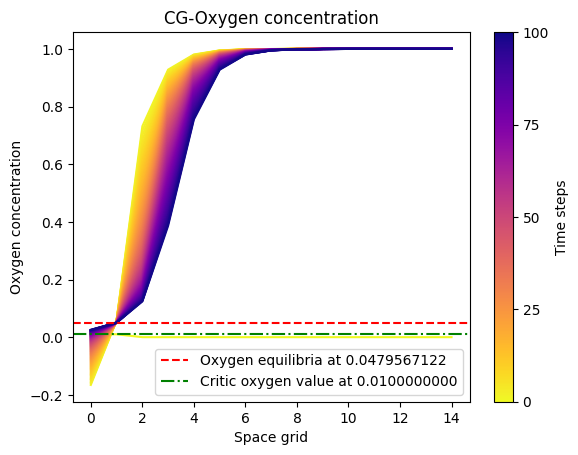

In [18]:
import os
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
import numpy as np

# Open the file
with open('eq', 'r') as file:
    # Read each line
    for line in file:
        # Split the line into two values using a space as the delimiter
        values = line.split()
        
        # If the file uses comma as delimiter, use line.split(',')
        
        # Extract the two values
        neq = values[0]
        ceq = values[1]
        ccr = values[2]
        
        # Do something with the values
        print("Value 1:", neq)
        print("Value 2:", ceq)
        print("Value 3:", ccr)

        
# Ruta de la carpeta que contiene los archivos de texto
carpeta = "OutputValuesOxygenCOMPARACION_old"

# Obtener la lista de archivos ordenados
archivos = sorted([archivo for archivo in os.listdir(carpeta) if archivo.endswith(".txt")], key=lambda x: int(x.split('.')[0][3:]))

# Configurar la gráfica

plt.xlabel('Space grid')
plt.ylabel('Oxygen concentration')
plt.title('CG-Oxygen concentration')

# Preparamos la barra de colores para la leyenda usando la paleta 'plasma', pero invertimos los colores
# Ahora invertimos la asignación de colores directamente en la creación de colores_leyenda
colores_leyenda = plt.cm.plasma(np.linspace(1, 0, len(archivos)))

# Leer y plotear los datos de cada archivo de texto
for i, archivo in enumerate(archivos[0:100]):
    with open(os.path.join(carpeta, archivo), 'r') as file:
        datos = file.readlines()
        # Extraemos los datos y los convertimos a números
        y = [float(linea.strip()) for linea in datos]
        # Plotear los datos con el color correspondiente
        plt.plot(y, color=colores_leyenda[i])
        
plt.axhline(y = float(ceq), linestyle='--', color='red', label = f'Oxygen equilibria at {ceq}')
plt.axhline(y = float(ccr), linestyle = '-.',color='green', label=f'Critic oxygen value at {ccr}')
plt.legend()
# Añadir la leyenda de tiempo como una barra de color invertida
norm = plt.Normalize(0, len(archivos))
sm = ScalarMappable(norm, plt.cm.plasma.reversed()) # Invertimos el colormap aquí
sm.set_array([])
cbar = plt.colorbar(sm, label='Time steps')
cbar.set_ticks(np.linspace(0, len(archivos), num=5)) # Ajustar a la cantidad de ticks que se prefiera
cbar.set_ticklabels([str(round(i)) for i in np.linspace(0, 100, num=5)]) # Etiquetas de 0 a 100
plt.savefig("Compara/Results/old_bc/oxygen")
# Mostrar la gráfica
#plt.savefig("Test1/oxy.png")
plt.show()



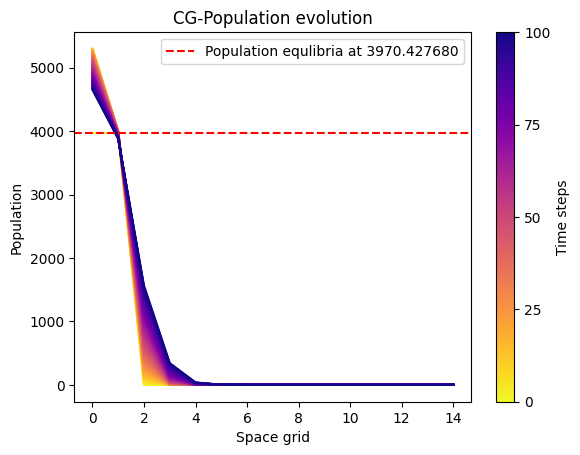

In [17]:
import os
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
import numpy as np

# Ruta de la carpeta que contiene los archivos de texto
carpeta = "OutputValuesPopulationCOMPARACION_old"

# Obtener la lista de archivos ordenados
archivos = sorted([archivo for archivo in os.listdir(carpeta) if archivo.endswith(".txt")], key=lambda x: int(x.split('.')[0][3:]))

# Configurar la gráfica

plt.xlabel('Space grid')
plt.ylabel('Population')
plt.title('CG-Population evolution')

# Preparamos la barra de colores para la leyenda usando la paleta 'plasma', pero invertimos los colores
# Ahora invertimos la asignación de colores directamente en la creación de colores_leyenda
colores_leyenda = plt.cm.plasma(np.linspace(1, 0, len(archivos)))

# Leer y plotear los datos de cada archivo de texto
for i, archivo in enumerate(archivos[0:100]):
    with open(os.path.join(carpeta, archivo), 'r') as file:
        datos = file.readlines()
        # Extraemos los datos y los convertimos a números
        y = [float(linea.strip()) for linea in datos]
      
        # Plotear los datos con el color correspondiente
        plt.plot(y, color=colores_leyenda[i])

plt.axhline(y = float(neq), linestyle='--', color='red', label = f'Population equlibria at {neq}')
plt.legend()
# Añadir la leyenda de tiempo como una barra de color invertida
norm = plt.Normalize(0, len(archivos))
sm = ScalarMappable(norm, plt.cm.plasma.reversed()) # Invertimos el colormap aquí
sm.set_array([])
cbar = plt.colorbar(sm, label='Time steps')
cbar.set_ticks(np.linspace(0, len(archivos), num=5)) # Ajustar a la cantidad de ticks que se prefiera
cbar.set_ticklabels([str(round(i)) for i in np.linspace(0, 100, num=5)]) # Etiquetas de 0 a 100
plt.savefig("Compara/Results/old_bc/population")
# Mostrar la gráfica
#plt.savefig("Test1/pop.png")

plt.show()


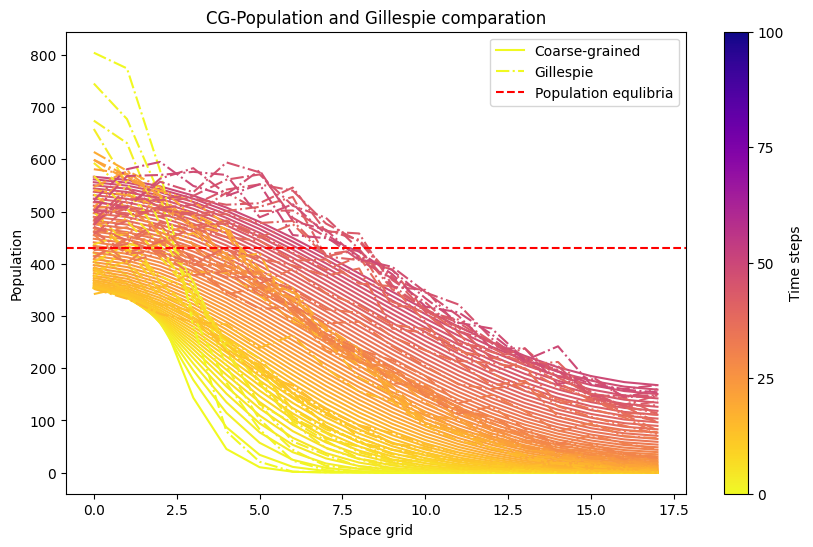

In [154]:
import os
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
import numpy as np

# Ruta de la carpeta que contiene los archivos de texto
carpeta1 = "OutputValuesPopulationa"
carpeta2 = "OutputValuesPopulationa copy"
# Obtener la lista de archivos ordenados
archivos1 = sorted([archivo for archivo in os.listdir(carpeta) if archivo.endswith(".txt")], key=lambda x: int(x.split('.')[0][3:]))
archivos2 = sorted([archivo for archivo in os.listdir(carpeta2) if archivo.endswith(".txt")], key=lambda x: int(x.split('.')[0][3:]))

# Configurar la gráfica
plt.figure(figsize=(10, 6))
plt.xlabel('Space grid')
plt.ylabel('Population')
plt.title('CG-Population and Gillespie comparation')

# Preparamos la barra de colores para la leyenda usando la paleta 'plasma', pero invertimos los colores
# Ahora invertimos la asignación de colores directamente en la creación de colores_leyenda
colores_leyenda = plt.cm.plasma(np.linspace(1, 0, len(archivos)))

# Leer y plotear los datos de cada archivo de texto
for i, archivo in enumerate(archivos1[2:len(archivos1):2]):
    with open(os.path.join(carpeta1, archivo), 'r') as file:
        datos = file.readlines()
        # Extraemos los datos y los convertimos a números
        y = [float(linea.strip()) for linea in datos]
        y = [elem*float(neq) for elem in y]
        if i == 0: 
             plt.plot(y, color=colores_leyenda[i], label = 'Coarse-grained')
        else: 
        # Plotear los datos con el color correspondiente
            plt.plot(y, color=colores_leyenda[i])
for i, archivo in enumerate(archivos2[2:len(archivos2):2]):
    with open(os.path.join(carpeta2, archivo), 'r') as file:
        datos = file.readlines()
        # Extraemos los datos y los convertimos a números
        y = [float(linea.strip()) for linea in datos]
        y = [elem for elem in y]
        if i == 0: 
            plt.plot(y, color=colores_leyenda[i], linestyle = '-.', label = 'Gillespie')
        else:
        # Plotear los datos con el color correspondiente
            plt.plot(y, color=colores_leyenda[i], linestyle = '-.')

plt.axhline(y = float(neq), linestyle='--', color='red', label = 'Population equlibria')
plt.legend()
# Añadir la leyenda de tiempo como una barra de color invertida
norm = plt.Normalize(0, len(archivos))
sm = ScalarMappable(norm, plt.cm.plasma.reversed()) # Invertimos el colormap aquí
sm.set_array([])
cbar = plt.colorbar(sm, label='Time steps')
cbar.set_ticks(np.linspace(0, len(archivos), num=5)) # Ajustar a la cantidad de ticks que se prefiera
cbar.set_ticklabels([str(round(i)) for i in np.linspace(0, 100, num=5)]) # Etiquetas de 0 a 100
#plt.savefig("LAMBDA_CTE/population")
# Mostrar la gráfica
plt.show()


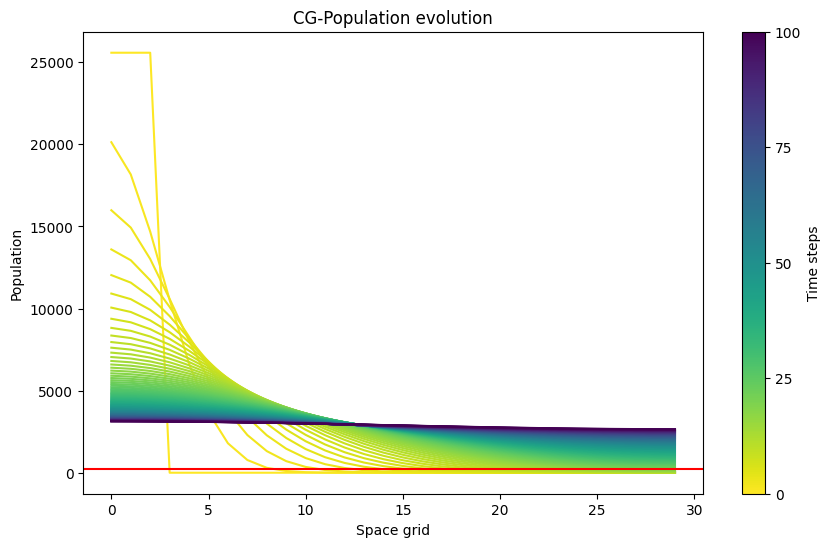

In [211]:
import os
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
import numpy as np

# Ruta de la carpeta que contiene los archivos de texto
carpeta = "OutputValuesPopulationa"

# Obtener la lista de archivos ordenados
archivos = sorted([archivo for archivo in os.listdir(carpeta) if archivo.endswith(".txt")], key=lambda x: int(x.split('.')[0][3:]))

# Configurar la gráfica
plt.figure(figsize=(10, 6))
plt.xlabel('Space grid')
plt.ylabel('Population')
plt.title('CG-Population evolution')

# Preparamos la barra de colores para la leyenda usando la paleta 'plasma', pero invertimos los colores
# Ahora invertimos la asignación de colores directamente en la creación de colores_leyenda
colores_leyenda = plt.cm.viridis(np.linspace(1, 0, len(archivos)))

# Leer y plotear los datos de cada archivo de texto
for i, archivo in enumerate(archivos):
    with open(os.path.join(carpeta, archivo), 'r') as file:
        datos = file.readlines()
        # Extraemos los datos y los convertimos a números
        y = [float(linea.strip()) for linea in datos]
        y = [elem*float(neq) for elem in y]
        # Plotear los datos con el color correspondiente
        plt.plot(y, label=f'{archivo}', color=colores_leyenda[i])
plt.axhline(y = float(neq), color='red')
# Añadir la leyenda de tiempo como una barra de color invertida
norm = plt.Normalize(0, len(archivos))
sm = ScalarMappable(norm, plt.cm.viridis.reversed()) # Invertimos el colormap aquí
sm.set_array([])
cbar = plt.colorbar(sm, label='Time steps')
cbar.set_ticks(np.linspace(0, len(archivos), num=5)) # Ajustar a la cantidad de ticks que se prefiera
cbar.set_ticklabels([str(round(i)) for i in np.linspace(0, 100, num=5)]) # Etiquetas de 0 a 100

# Mostrar la gráfica
plt.show()


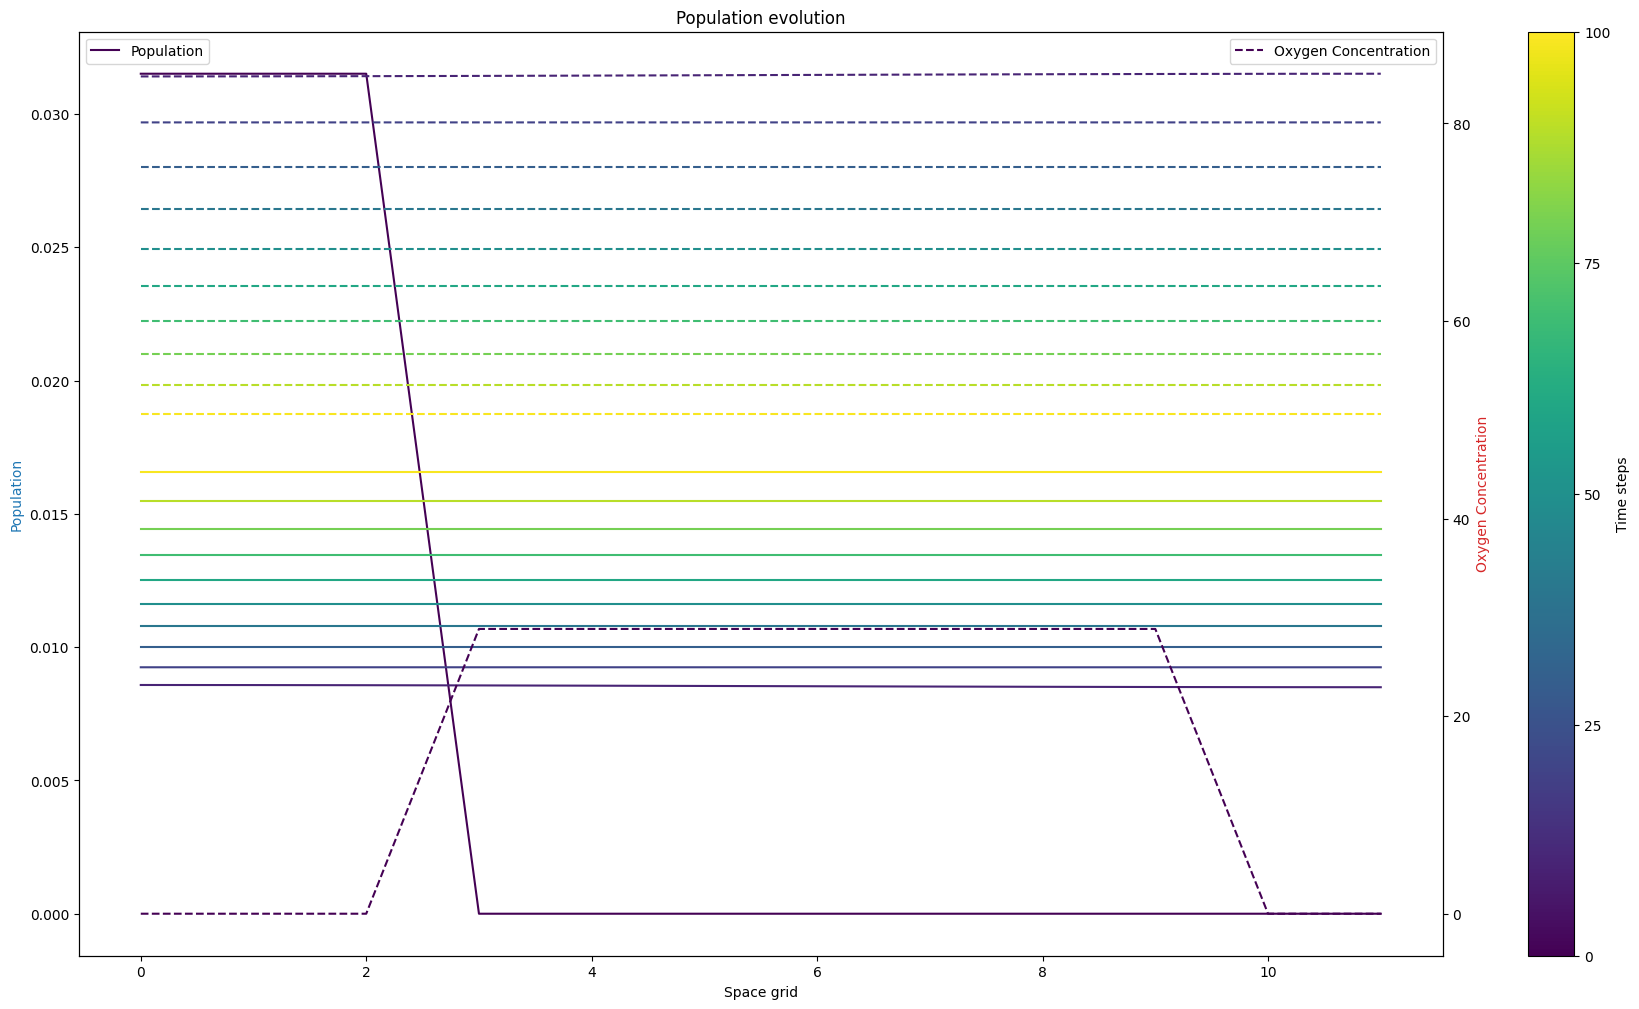

In [78]:
import os
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
import numpy as np

# Function to read data from a folder
def read_data_from_folder(folder):
    # Obtener la lista de archivos ordenados
    archivos = sorted([archivo for archivo in os.listdir(folder) if archivo.endswith(".txt")],
                      key=lambda x: int(x.split('.')[0][3:]))
    data = []
    for archivo in archivos:
        with open(os.path.join(folder, archivo), 'r') as file:
            datos = file.readlines()
            # Extraemos los datos y los convertimos a números
            y = [float(linea.strip()) for linea in datos]
            data.append(y)
    return data

# Ruta de las carpetas que contienen los archivos de texto
carpeta1 = "OutputValuesPopulationa"
carpeta2 = "OutputValuesOxygena"

# Leer los datos de ambas carpetas
data1 = read_data_from_folder(carpeta1)
data2 = read_data_from_folder(carpeta2)


# Configurar la gráfica
fig, ax1 = plt.subplots(figsize=(22, 12))

# Primer conjunto de datos
ax1.set_xlabel('Space grid')
ax1.set_ylabel('Population', color='tab:blue')
ax1.set_title('Population evolution')

# Preparamos la barra de colores para la leyenda usando la paleta 'plasma', pero invertimos los colores
colormap = plt.cm.viridis
norm1 = plt.Normalize(0, len(data1))
colores_leyenda1 = colormap(norm1(range(len(data1))))
# Plot every nth file
step_size = 10

# For data1
for i in range(0, len(data1), step_size):
    y = data1[i]
    ax1.plot(y, label=f'Folder1 - Step {i}', color=colores_leyenda1[i])

# Añadir la leyenda de tiempo como una barra de color invertida
sm1 = ScalarMappable(norm1, colormap)
sm1.set_array([])
cbar1 = plt.colorbar(sm1, ax=ax1, label='Time steps')
cbar1.set_ticks(np.linspace(0, len(data1), num=5))
cbar1.set_ticklabels([str(round(i)) for i in np.linspace(0, 100, num=5)])

# Crear un segundo eje y para el segundo conjunto de datos
ax2 = ax1.twinx()

# Segundo conjunto de datos
ax2.set_ylabel('Oxygen Concentration', color='tab:red')

# Plotear los datos de la segunda carpeta
norm2 = plt.Normalize(0, len(data2))
colores_leyenda2 = colormap(norm2(range(len(data2))))
# For data2
for i in range(0, len(data2), step_size):
    y = data2[i]
    ax2.plot(y, label=f'Folder2 - Step {i}', color=colores_leyenda2[i], linestyle='--')

# Añadir la leyenda de tiempo como una barra de color invertida
# sm2 = ScalarMappable(norm2, colormap)
# sm2.set_array([])
# cbar2 = plt.colorbar(sm2, ax=ax2, label='Time steps (Folder2)')
# cbar2.set_ticks(np.linspace(0, len(data2), num=5))
# cbar2.set_ticklabels([str(round(i)) for i in np.linspace(0, 100, num=5)])
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles1, ['Population'], loc='upper left')
ax2.legend(handles2, ['Oxygen Concentration'], loc='upper right')

# Mostrar la gráfica
plt.show()


In [1]:
## prueba para commit en rama main remota 

In [173]:
import os
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
import numpy as np
import imageio

# Folder that contains text files
folder = "OutputValuesPopulationa"

# Get the sorted list of files
files = sorted([file for file in os.listdir(folder) if file.endswith(".txt")], key=lambda x: int(x.split('.')[0][3:]))

# Determine the global min and max y-values to keep y-axis fixed
min_y, max_y = float('0'), -float('1')
for file in files:
    with open(os.path.join(folder, file), 'r') as f:
        data = f.readlines()
        y = [float(line.strip())*float(neq) for line in data]
        min_y = min(min_y, min(y))
        max_y = max(max_y, max(y))

# Adjust the range slightly to avoid clipping the highest and lowest points
y_range = (min_y - (max_y - min_y) * 0.05, max_y + (max_y - min_y) * 0.05)

# Create a directory for the frames
frames_dir = "frames"
os.makedirs(frames_dir, exist_ok=True)

# Generate a frame for each time step with fixed y-axis
for i, file in enumerate(files):
    plt.figure(figsize=(10, 6))
    plt.xlabel('Space grid')
    plt.ylabel('Population')
    plt.title('CG-population evolution')
    plt.ylim(y_range)  # Set the y-axis to the fixed range

    color_legend = plt.cm.viridis(np.linspace(1, 0, len(files)))
    norm = plt.Normalize(0, len(files))
    sm = ScalarMappable(norm, plt.cm.viridis.reversed())
    sm.set_array([])
    cbar = plt.colorbar(sm, label='Time steps')
    cbar.set_ticks(np.linspace(0, len(files), num=5))
    cbar.set_ticklabels([str(round(i)) for i in np.linspace(0, 100, num=5)])

    with open(os.path.join(folder, file), 'r') as f:
        data = f.readlines()
        y = [float(line.strip())*float(neq) for line in data]
        plt.plot(y, color=color_legend[i])
        plt.axhline(y = float(neq), linestyle = '--', color = 'red', label='Equilibria')
        plt.legend()
    
    frame_path = os.path.join(frames_dir, f"frame_{i:04d}.png")
    plt.savefig(frame_path)
    plt.close()

# Create video from frames
with imageio.get_writer('S_0.003.mp4', fps=5) as video:
    for i in range(len(files)):
        frame_path = os.path.join(frames_dir, f"frame_{i:04d}.png")
        video.append_data(imageio.imread(frame_path))

# Optional: Cleanup frames directory
# import shutil
# shutil.rmtree(frames_dir)

print("Video created: population_evolution.mp4")


/Users/nbrinas/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:60: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (1000, 600) to (1008, 608) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


Video created: population_evolution.mp4


In [241]:
import os
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
import numpy as np
import imageio

# Folder that contains text files
folder = "OutputValuesOxygena"

# Get the sorted list of files
files = sorted([file for file in os.listdir(folder) if file.endswith(".txt")], key=lambda x: int(x.split('.')[0][3:]))

# Determine the global min and max y-values to keep y-axis fixed
min_y, max_y = float('0'), -float('1')
for file in files:
    with open(os.path.join(folder, file), 'r') as f:
        data = f.readlines()
        y = [float(line.strip())*float(ceq) for line in data]
        min_y = min(min_y, min(y))
        max_y = max(max_y, max(y))

# Adjust the range slightly to avoid clipping the highest and lowest points
y_range = (min_y - (max_y - min_y) * 0.05, max_y + (max_y - min_y) * 0.05)

# Create a directory for the frames
frames_dir = "frames_more_r"
os.makedirs(frames_dir, exist_ok=True)

# Generate a frame for each time step with fixed y-axis
for i, file in enumerate(files):
    plt.figure(figsize=(10, 6))
    plt.xlabel('Space grid')
    plt.ylabel('Population')
    plt.title('CG-OXYGEN evolution')
    plt.ylim(y_range)  # Set the y-axis to the fixed range

    color_legend = plt.cm.viridis(np.linspace(1, 0, len(files)))
    norm = plt.Normalize(0, len(files))
    sm = ScalarMappable(norm, plt.cm.viridis.reversed())
    sm.set_array([])
    cbar = plt.colorbar(sm, label='Time steps')
    cbar.set_ticks(np.linspace(0, len(files), num=5))
    cbar.set_ticklabels([str(round(i)) for i in np.linspace(0, 100, num=5)])

    with open(os.path.join(folder, file), 'r') as f:
        data = f.readlines()
        y = [float(line.strip())*float(ceq) for line in data]
        plt.plot(y, color=color_legend[i])
        plt.axhline(y = float(ceq), linestyle = '--', color = 'red', label='Equilibria')
        plt.legend()
    
    frame_path = os.path.join(frames_dir, f"frame_{i:04d}.png")
    plt.savefig(frame_path)
    plt.close()

# Create video from frames
with imageio.get_writer('oxy.mp4', fps=5) as video:
    for i in range(len(files)):
        frame_path = os.path.join(frames_dir, f"frame_{i:04d}.png")
        video.append_data(imageio.imread(frame_path))

# Optional: Cleanup frames directory
# import shutil
# shutil.rmtree(frames_dir)

print("Video created: population_evolution.mp4")


/Users/nbrinas/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:60: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (1000, 600) to (1008, 608) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


Video created: population_evolution.mp4


In [282]:
ceq

'0.0479567122'

In [147]:
import os
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
import numpy as np
import imageio

# Folders that contain text files
folder2 = "OutputValuesOxygenTEST7"
folder1 = "OutputValuesPopulationTEST7"

# Get the sorted list of files
files1 = sorted([file for file in os.listdir(folder1) if file.endswith(".txt")], key=lambda x: int(x.split('.')[0][3:]))[:62]
files2 = sorted([file for file in os.listdir(folder2) if file.endswith(".txt")], key=lambda x: int(x.split('.')[0][3:]))[:62]

# Determine the global min and max y-values to keep y-axis fixed
min_y1, max_y1 = float('inf'), -float('inf')
min_y2, max_y2 = float('inf'), -float('inf')

# Read first dataset to find global min and max y-values
for file in files1[0:62]:
    with open(os.path.join(folder1, file), 'r') as f:
        data = f.readlines()
        y1 = [float(line.strip()) for line in data]
        min_y1 = min(min_y1, min(y1))
        max_y1 = max(max_y1, max(y1))

# Read second dataset to find global min and max y-values
for file in files2[0:62]:
    with open(os.path.join(folder2, file), 'r') as f:
        data = f.readlines()
        y2 = [float(line.strip()) for line in data]
        min_y2 = min(min_y2, min(y2))
        max_y2 = max(max_y2, max(y2))

# Adjust the range slightly to avoid clipping the highest and lowest points
y_range1 = (min_y1 - (max_y1 - min_y1) * 0.05, max_y1 + (max_y1 - min_y1) * 0.05)
y_range2 = (min_y2 - (max_y2 - min_y2) * 0.05, max_y2 + (max_y2 - min_y2) * 0.05)

# Create a directory for the frames
frames_dir = "frames_combined"
os.makedirs(frames_dir, exist_ok=True)

# Generate a frame for each time step with fixed y-axis
for i, (file1, file2) in enumerate(zip(files1, files2)):
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # First dataset (original)
    ax1.set_xlabel('Space grid')
    ax1.set_ylabel('Population concentration')
    ax1.set_ylim(y_range1)  # Set the y-axis to the fixed range
    # color_legend = plt.cm.viridis(np.linspace(1, 0, len(files1)))
    # norm = plt.Normalize(0, len(files1))
    # sm = ScalarMappable(norm, plt.cm.viridis.reversed())
    # sm.set_array([])
    # cbar = plt.colorbar(sm, ax=ax1, label='Time steps')
    # cbar.set_ticks(np.linspace(0, len(files1), num=5))
    # cbar.set_ticklabels([str(round(i)) for i in np.linspace(0, 100, num=5)])

    with open(os.path.join(folder1, file1), 'r') as f:
        data = f.readlines()
        y1 = [float(line.strip()) for line in data]
        ax1.plot(y1, 'green', label='Population')
        ax1.axhline(y=float(neq), linestyle='--', color='orange', label='Population equilibria')

    # Second dataset (new)
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    ax2.set_ylabel('Oxygen concentration')  # we already handled the x-label with ax1
    ax2.set_ylim(y_range2)
    with open(os.path.join(folder2, file2), 'r') as f:
        data = f.readlines()
        y2 = [float(line.strip()) for line in data]
        ax2.plot(y2, color='blue', label='Oxygen concentration')

        ax2.axhline(y=float(ceq), linestyle='--', color='purple', label='Oxygen equilibria')

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    fig.legend(loc='upper right')

    frame_path = os.path.join(frames_dir, f"frame_{i:04d}.png")
    plt.savefig(frame_path)
    plt.close()

# Create video from frames
with imageio.get_writer('oxy-popTEST7.mp4', fps=5) as video:
    for i in range(len(files1)):
        frame_path = os.path.join(frames_dir, f"frame_{i:04d}.png")
        video.append_data(imageio.imread(frame_path))

# Optional: Cleanup frames directory
# import shutil
# shutil.rmtree(frames_dir)

print("Video created: oxy.mp4")


/Users/nbrinas/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:87: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (1000, 600) to (1008, 608) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


Video created: oxy.mp4


In [279]:
import os
import matplotlib.pyplot as plt
import numpy as np
import imageio

# Folders that contain text files
folder1 = "OutputValuesOxygena"
folder2 = "OutputValuesPopulationGood"

# Get the sorted list of files
files1 = sorted([file for file in os.listdir(folder1) if file.endswith(".txt")], key=lambda x: int(x.split('.')[0][3:]))[:62]
files2 = sorted([file for file in os.listdir(folder2) if file.endswith(".txt")], key=lambda x: int(x.split('.')[0][3:]))[:62]

# Determine the global min and max y-values to keep y-axis fixed
min_y1, max_y1 = float('inf'), -float('inf')
min_y2, max_y2 = float('inf'), -float('inf')

# Read first dataset to find global min and max y-values
for file in files1:
    with open(os.path.join(folder1, file), 'r') as f:
        data = f.readlines()
        y1 = [float(line.strip()) for line in data]
        min_y1 = min(min_y1, min(y1))
        max_y1 = max(max_y1, max(y1))

# Read second dataset to find global min and max y-values
for file in files2:
    with open(os.path.join(folder2, file), 'r') as f:
        data = f.readlines()
        y2 = [float(line.strip()) for line in data]
        min_y2 = min(min_y2, min(y2))
        max_y2 = max(max_y2, max(y2))

# Adjust the range slightly to avoid clipping the highest and lowest points
y_range1 = (min_y1 - (max_y1 - min_y1) * 0.05, max_y1 + (max_y1 - min_y1) * 0.05)
y_range2 = (min_y2 - (max_y2 - min_y2) * 0.05, max_y2 + (max_y2 - min_y2) * 0.05)

# Create a directory for the frames
frames_dir = "frames_combined"
os.makedirs(frames_dir, exist_ok=True)

# Generate a frame for each time step with fixed y-axis
for i, (file1, file2) in enumerate(zip(files1, files2)):
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # First dataset (Oxygen)
    ax1.set_xlabel('Space grid')
    ax1.set_ylabel('Population', color='tab:blue')
    ax1.set_ylim(y_range2)  # Set the y-axis to the fixed range for the second dataset (population)

    with open(os.path.join(folder1, file1), 'r') as f:
        data = f.readlines()
        y1 = [float(line.strip()) for line in data]
        ax1.plot(y1, color='tab:blue', linestyle='--', label='Population')

    # Second dataset (Other Data)
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    ax2.set_ylabel('Oxygen concentration', color='tab:green')  # we already handled the x-label with ax1
    ax2.set_ylim(y_range1)  # Set the y-axis to the fixed range for the first dataset (oxygen)

    with open(os.path.join(folder2, file2), 'r') as f:
        data = f.readlines()
        y2 = [float(line.strip()) for line in data]
        ax2.plot(y2, color='tab:green', linestyle='-', label='Oxygen concentration')

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    fig.legend(loc='upper right')

    frame_path = os.path.join(frames_dir, f"frame_{i:04d}.png")
    plt.savefig(frame_path)
    plt.close()

# Create video from frames
with imageio.get_writer('oxy.mp4', fps=5) as video:
    for i in range(len(files1)):
        frame_path = os.path.join(frames_dir, f"frame_{i:04d}.png")
        video.append_data(imageio.imread(frame_path))

# Optional: Cleanup frames directory
# import shutil
# shutil.rmtree(frames_dir)

print("Video created: oxy.mp4")


/Users/nbrinas/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:77: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (1000, 600) to (1008, 608) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


Video created: oxy.mp4
